The Receiver Operating Characteristic (ROC) curve is a fundamental tool for
evaluating the performance of a binary classifier. It visually represents the trade-
off between the True Positive Rate (TPR) and False Positive Rate (FPR). The Area Under the Curve (AUC) is a widely used
summary metric that quantifies the overall ability of a model to distinguish
between classes.

AUC (Area Under Curve): A single number that summarizes the overall
performance of a model.

- True Positive (TP): The model correctly predicts the positive class.
- False Positive (FP): The model incorrectly predicts the positive class.
- True Negative (TN): The model correctly predicts the negative class.
- False Negative (FN): The model incorrectly predicts the negative class.

# Code Implementation

AUC Score: 0.9216


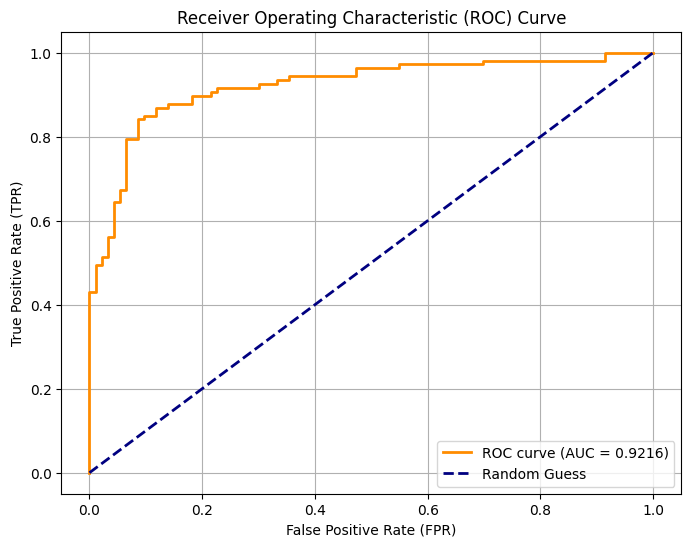

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score,roc_curve

x,y = make_classification(n_samples=1000,n_features=20,random_state=42)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

lgr = LogisticRegression(solver="liblinear")
lgr.fit(xtrain,ytrain)

yprob = lgr.predict_proba(xtest)[:,1]

#calculate roc_curve
fpr, tpr, thresholds = roc_curve(ytest, yprob)
#calculate auc
auc_score = roc_auc_score(ytest, yprob)

print(f"AUC Score: {auc_score:.4f}")
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

AUC Ranges:
- 1.0: Perfect classification.
- 0.9 - 1.0: Excellent.
- 0.8 - 0.9: Good.
- 0.7 - 0.8: Fair.
- 0.5: No discrimination (random guessing).